In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import t
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D


## Question 1 

In [15]:
table = pd.read_csv('invest.txt',sep=' ')
table[0:5]

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


## Question 2

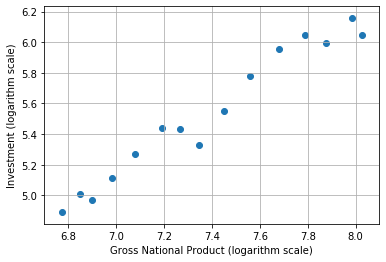

In [3]:
plt.figure()
axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(np.log(table['gnp']),np.log(table['invest']) )
plt.xlabel('Gross National Product (logarithm scale)')
plt.ylabel('Investment (logarithm scale)')
plt.show()

We are working with Investment and GNP log-transformed.

## Question 3

The slope is equal to 1.01528 and its standard deviation is equal to 0.05538
The intercept is equal to -2.0 and its standard deviation is equal to  0.40955
The determination coefficient for ordinary least squares is equal to 0.96276
Linear Regression by hand : log(Invest) =  1.015281401598871  * log(GNP) -1.96359
Standard Deviation: sigma =  0.08761


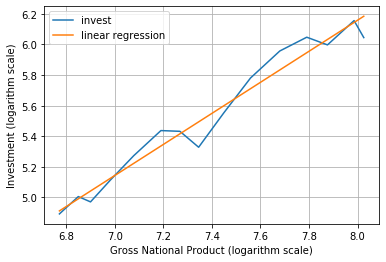

In [4]:
#Values in log, linear regression
Data=np.asarray(np.log(table))
n=len(Data[:,0])
moyY=sum(Data[:,2])/len(Data) #mean invest in log
moyX=sum(Data[:,1])/len(Data) #mean gnp in log
slope=sum((Data[:,1]-moyX)*(Data[:,2]-moyY))/sum((Data[:,1]-moyX)**2)
intercept= moyY -slope*moyX

def linear_reg(x):
    return (slope*x+intercept)

#Calcul of the standard deviation and determination coefficient
sigma=sum((Data[:,2]-linear_reg(Data[:,1]))**2)/(n-2)
var_intercept=sigma*((1/len(Data))+(moyX**2)/sum((Data[:,1]-moyX)**2))
var_slope=sigma/sum((Data[:,1]-moyX)**2)
det_coeff=1-sum((Data[:,2]-linear_reg(Data[:,1]))**2)/sum((Data[:,2]-moyY)**2)

print("The slope is equal to "+str(round(slope,5))+" and its standard deviation is equal to "+str(round(np.sqrt(var_slope),5)) )  
print("The intercept is equal to "+str(round(intercept))+" and its standard deviation is equal to ", np.round(np.sqrt(var_intercept),5)) 
print("The determination coefficient for ordinary least squares is equal to "+str(round(det_coeff,5))) 
print("Linear Regression by hand : log(Invest) = ", slope ," * log(GNP)", round(intercept,5))
print("Standard Deviation: sigma = ", round(np.sqrt(sigma),5))

#Afficher                 
plt.figure()
axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.plot(Data[:,1],Data[:,2],label='invest')
plt.plot(Data[:,1],linear_reg(Data[:,1]),label='linear regression')
plt.xlabel('Gross National Product (logarithm scale)')
plt.ylabel('Investment (logarithm scale)')
plt.legend()
plt.show()

## Question 4

In [5]:
val = slope/np.sqrt(var_slope)
t_quantile = t.interval(0.95, df = n-2)
print("Value of the statistical test : ", str(round(val,5)))

#Statistical test for H0
if t_quantile[0] <= val <= t_quantile[1] : print("Test not rejected");
else : print ("Test rejected with a level 0.90");

#p-value computed
p_value = (1-t.cdf(np.abs(val), df = n-2))*2
print("\nThe p-value of the statistical test is ", round(p_value,15))

Value of the statistical test :  18.33198
Test rejected with a level 0.90

The p-value of the statistical test is  1.13637e-10


The p value is really small, therefore the null hypothesis can be rejected. The odds of observing such data while assuming that the slope is equal to zero are very low.

## Question 5
In this question, the GNP is equal to 1000.

In [6]:
print("The investment estimation for a GNP value of 1000 is", str(round(np.exp(linear_reg(np.log(1000))),5)))

#Confidence interval
def CI(x):
    CI_L = linear_reg(x) - t.ppf(0.95, df = n-2 )*np.sqrt(sigma)*np.sqrt(1/n + (x - moyX)**2/np.sum((Data[:,1]-moyX)**2))
    CI_R = linear_reg(x) + t.ppf(0.95, df = n-2 )*np.sqrt(sigma)*np.sqrt(1/n + (x - moyX)**2/np.sum((Data[:,1]-moyX)**2))
    return (CI_L, CI_R)
print("\nConfidence interval at the level 95% is: [", round(np.exp(CI(np.log(1000))[0]),5) ,",", round(np.exp(CI(np.log(1000))[1]),5),"]")

#Prediction interval
def PI(x):
    PI_L = linear_reg(x) - t.ppf(0.025, df = n-2 )*np.sqrt(sigma)*np.sqrt(1 + 1/n + (x - moyX)**2/np.sum((Data[:,1]-moyX)**2))
    PI_R = linear_reg(x) + t.ppf(0.025, df = n-2 )*np.sqrt(sigma)*np.sqrt(1 + 1/n + (x - moyX)**2/np.sum((Data[:,1]-moyX)**2))
    return(PI_L, PI_R)
print("\nPrediction interval at the level 95% is: [", round(np.exp(PI(np.log(1000))[0]),5) ,",", round(np.exp(PI(np.log(1000))[1]),5),"]")

The investment estimation for a GNP value of 1000 is 155.97943

Confidence interval at the level 95% is: [ 146.67553 , 165.87349 ]

Prediction interval at the level 95% is: [ 191.20212 , 127.24535 ]


## Question 6

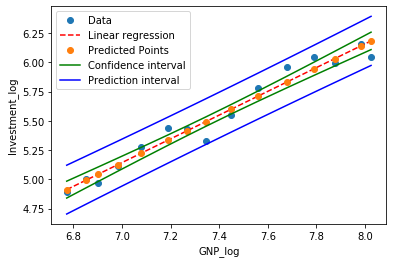

In [7]:
fig, ax = plt.subplots()
ax.plot(Data[:,1], Data[:,2], 'o')
ax.plot(Data[:,1], linear_reg(Data[:,1]), 'r--')
ax.plot(Data[:,1], linear_reg(Data[:,1]), 'o')
ax.plot(Data[:,1], CI(Data[:,1])[0] , 'g')
ax.plot(Data[:,1], PI(Data[:,1])[0] , 'b')
ax.plot(Data[:,1], CI(Data[:,1])[1] , 'g')
ax.plot(Data[:,1], PI(Data[:,1])[1] , 'b')

ax.set(xlabel='GNP_log', ylabel='Investment_log')
plt.legend(('Data','Linear regression','Predicted Points', 'Confidence interval', 'Prediction interval'))
plt.show()

## Question 7

In [8]:
#Linear Regression from sklearn
regr = LinearRegression().fit(Data[:,1].reshape(-1,1), Data[:,2])

print("Linear Regression from sklearn: log(Invest) = ", round(regr.coef_[0],5) ," * log(GNP)", round(regr.intercept_,5))
print("Determination Coefficient from sklearn: ",round(regr.score(Data[:,1].reshape(-1,1), Data[:,2]),5))

#Prediction
print("Sklearn prediction for GNP value of 1000: ",round(np.exp(regr.predict(np.array(np.log(1000)).reshape(1,-1))[0]),5))

Linear Regression from sklearn: log(Invest) =  1.01528  * log(GNP) -1.96359
Determination Coefficient from sklearn:  0.96276
Sklearn prediction for GNP value of 1000:  155.97943


The linear regression is the same as the hand made one.

## Question 8

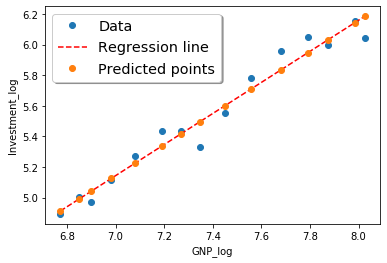

In [9]:
#Plot of the dataset and the regression line
fig, ax = plt.subplots()
ax.plot(Data[:,1], Data[:,2], 'o', label = 'Data')
ax.plot(Data[:,1], linear_reg(Data[:,1]), 'r--', label = 'Regression line' )

predicted = regr.predict(Data[:,1].reshape(-1,1));
ax.plot(Data[:,1], predicted, 'o', label = 'Predicted points')

ax.set(xlabel='GNP_log', ylabel='Investment_log')
ax.legend(loc='best', shadow=True, fontsize='x-large')

plt.show()

We observe the same distribution as in question 6.

## Question 9

In [10]:
X = np.transpose(np.array([[1]*n, Data[:,1], np.exp(Data[:,4])]))
Y=np.transpose(Data[:,2])
gram = np.dot(np.transpose(X), X)/n

print("Gram Matrix on gnp and interest: \n", gram)
print("Rank of Gram Matrix: ", np.linalg.matrix_rank(gram))

Gram Matrix on gnp and interest: 
 [[ 1.          7.38352141  7.45266667]
 [ 7.38352141 54.68323179 55.94590287]
 [ 7.45266667 55.94590287 62.92371333]]
Rank of Gram Matrix:  3


La matrice de Gram est donc inversible. 

## Question 10

In [11]:
#Calcul de la regression
inv= np.linalg.inv(np.dot(np.transpose(X), X))
theta = np.dot(inv,np.dot(np.transpose(X),Y))
print("Linear Regression : log(Invest) = ", round(theta[2],5)," * interest + ", round(theta[1],5)," * log(GNP) + ", round(theta[0],5))

def regression(gnp,interest):
    return (theta[2]*interest+theta[1]*gnp+theta[0])

#Calcul standard deviation
sigmabis =(1/(n-3))*(np.linalg.norm(Y - np.dot(X, theta))**2)
C = sigmabis* inv  
print("\nGeneral standard deviation = ", round(np.sqrt(sigmabis),5))

#Calcul Determination Coefficient
det_coeff=np.sum((np.dot(X, theta)-np.mean(Y))**2)/np.sum((Y - np.mean(Y))**2)
print("\nDetermination coefficient is equal to ", round(det_coeff,5))

#Calcul p-values
def pValue(beta,standard_dev):
    val=beta/standard_dev
    return (2*(1-t.cdf(np.abs(val), n-3)))


print("\nBo is equal to ", round(theta[0],5))
print("Standard deviation = ", round(np.sqrt(C[0][0]),5))
print("P-value = ",round(pValue(theta[0],np.sqrt(C[0][0])),5))

print("\nB1 is equal to ", round(theta[1],5))
print("Standard deviation = ", round(np.sqrt(C[1][1]),5))
print("P-value = ", round(pValue(theta[1],np.sqrt(C[1][1])),12))

print("\nB2 is equal to ", round(theta[2],5))
print("Standard deviation = ", round(np.sqrt(C[2][2]),5))
print("P-value = ", round(pValue(theta[2],np.sqrt(C[2][2])),5))

Linear Regression : log(Invest) =  -0.00653  * interest +  1.05124  * log(GNP) +  -2.18045

General standard deviation =  0.09051

Determination coefficient is equal to  0.96331

Bo is equal to  -2.18045
Standard deviation =  0.6624
P-value =  0.00644

B1 is equal to  1.05124
Standard deviation =  0.10206
P-value =  2.59952e-07

B2 is equal to  -0.00653
Standard deviation =  0.01534
P-value =  0.67801


Bo andd B1 have the same order of magnitude and their p-values are quite small.
Bo's p-value is smaller than 0.01, so we can reject the hypothesis that Bo is null with a 99% certitude.
B1's p-value is smaller than 1.e-06, so we can clearly reject the null hypothesis. 

On the other hand, B2 is close to zero, and its p-value is close to 1, so we can't reject the null hypothesis, however we can't accept the null hypothesis.

## Question 11

In [12]:
print("Predicted log(Investment) : ", round((regression(np.log(1000),10)),5))

#Confidence interval
def CI_2D(gnp, interest):
    x = np.array([1, gnp, interest])
    CI_L = regression(gnp,interest) - t.ppf(0.9995, df = n-3 )*np.sqrt(sigmabis*np.dot(np.dot(np.transpose(x), inv), x));
    CI_R = regression(gnp,interest) + t.ppf(0.9995, df = n-3 )*np.sqrt(sigmabis*np.dot(np.dot(np.transpose(x), inv), x));
    return (CI_L, CI_R)
print("Confidence Interval of log(Ivestment) at level 99,9%:", np.round(CI_2D(np.log(1000),10),5))

#Prediction interval 
def PI_2D(gnp, interest):
    x = np.array([1, gnp, interest])
    PI_L = regression(gnp,interest) - t.ppf(0.9995, df = n-3 )*np.sqrt(sigmabis*(1 + np.dot(np.dot(np.transpose(x), inv), x)));
    PI_R = regression(gnp,interest) + t.ppf(0.9995, df = n-3 )*np.sqrt(sigmabis*(1 + np.dot(np.dot(np.transpose(x), inv), x)));
    return (PI_L, PI_R)
print("Prediction Interval of log(Ivestment) at level 99,9%:", np.round(PI_2D(np.log(1000),10),5))

Predicted log(Investment) :  5.01598
Confidence Interval of log(Ivestment) at level 99,9%: [4.64018 5.39178]
Prediction Interval of log(Ivestment) at level 99,9%: [4.4738  5.55816]


## Question 12

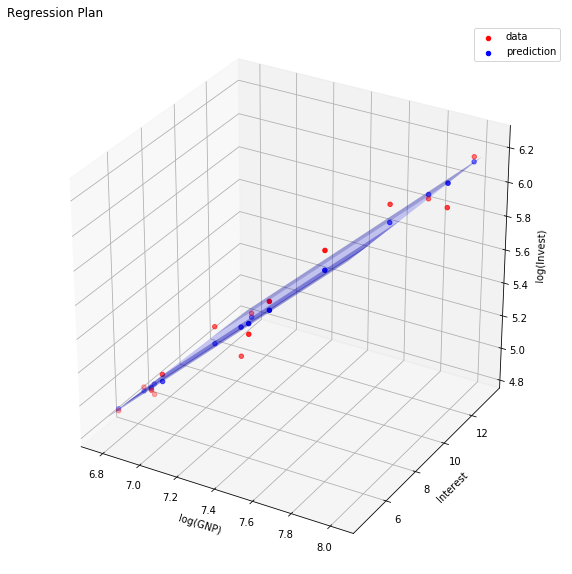

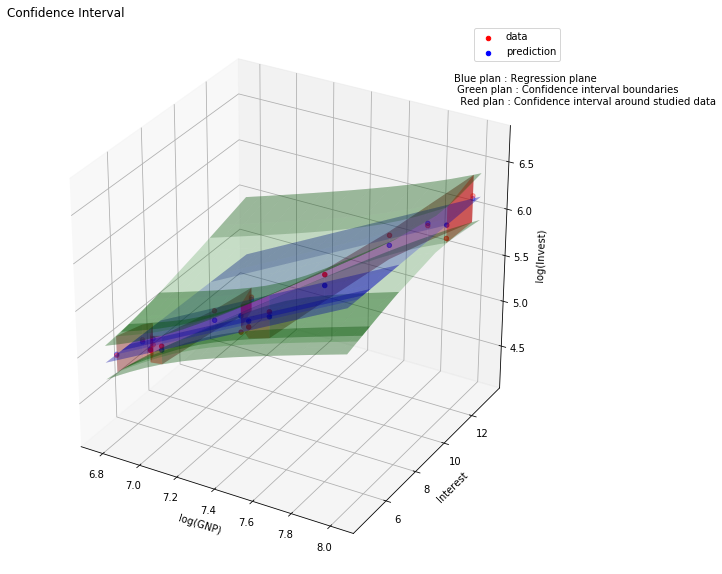

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
fig.set_figheight(10)
fig.set_figwidth(10)


# Observed data and prediction
ax.scatter3D(Data[:,1], np.exp(Data[:,4]), Data[:,2], c='r')
ax.scatter3D(Data[:,1], np.exp(Data[:,4]), [regression(Data[i,1], np.exp(Data[i,4])) for i in range(n)], c='b')

#Regression plane
I, J = np.meshgrid(Data[:,1],np.exp(Data[:,4]))
K=regression(I,J)
ax.plot_surface(I, J, K, alpha = 0.2,color='b')

ax.set_xlabel('log(GNP)')
ax.set_ylabel('Interest')
ax.set_zlabel('log(Invest)')
ax.set_title("Regression Plan",loc='left')
plt.legend(('data','prediction'))
plt.show()

#confidence interval plot
def CI_low(gnp,interest):
    return CI_2D(gnp,interest)[0]
def CI_up(gnp,interest):
    return CI_2D(gnp,interest)[1]

L=CI_low(I,J)
M=CI_up(I,J)
conf_inf=CI_low(Data[:,1], np.exp(Data[:,4]))
conf_sup=CI_up(Data[:,1], np.exp(Data[:,4]))
ax.plot_surface(I,J ,L,color='g', alpha=0.2,label='Confidence Interval')
ax.plot_surface(I,J , M, color='g',alpha=0.2)
ax.plot_surface(Data[:,1], np.exp(Data[:,4]), np.array([conf_inf, conf_sup]), alpha = 0.4,color='red')
ax.set_title('Confidence Interval',loc='left')
ax.text2D(0.8, 0.85, "Blue plan : Regression plane \n Green plan : Confidence interval boundaries \n  Red plan : Confidence interval around studied data",
          transform=ax.transAxes)
fig

## Question 13
In this question, GNP=1000 and Interest=10.

In [14]:
#Linear Regression from sklearn
regr = LinearRegression()
#Building the training set
Z = [[Data[i,1],np.exp(Data[i,4])] for i in range(n)]
regr.fit(Z, Data[:,2])

print("Linear Regression : log(Invest) = ", round(regr.coef_[1],5)," * interest + ", round(regr.coef_[0],5)," * log(GNP) + ", round(regr.intercept_,5))
print("Determination Coefficient from sklearn: ",round(regr.score(Z, Data[:,2]),5))

#Prediction
print("Sklearn log(Investment) prediction for GNP=1000 and Interest=10: ",round(regr.predict(np.array([np.log(1000),10]).reshape(1,-1))[0],5))

Linear Regression : log(Invest) =  -0.00653  * interest +  1.05124  * log(GNP) +  -2.18045
Determination Coefficient from sklearn:  0.96331
Sklearn log(Investment) prediction for GNP=1000 and Interest=10:  5.01598


Those results match with the ones obtained in question 10 and 11. 